In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data.

In [3]:
df = pd.read_csv("../data/data.csv")

Show the first 5 rows of the data to see how the data is structured and what columns are there.

In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
df.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [7]:
# Size of the dataframe
df.shape

(95662, 16)

In [19]:
# Summary for categorical columns
df.describe(include=['object', 'category'])

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [9]:
df.mean(numeric_only=True)

CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64

In [10]:
# Variance
print(df.var(numeric_only=True))

CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64


In [11]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

# Visualizing numerical columns.

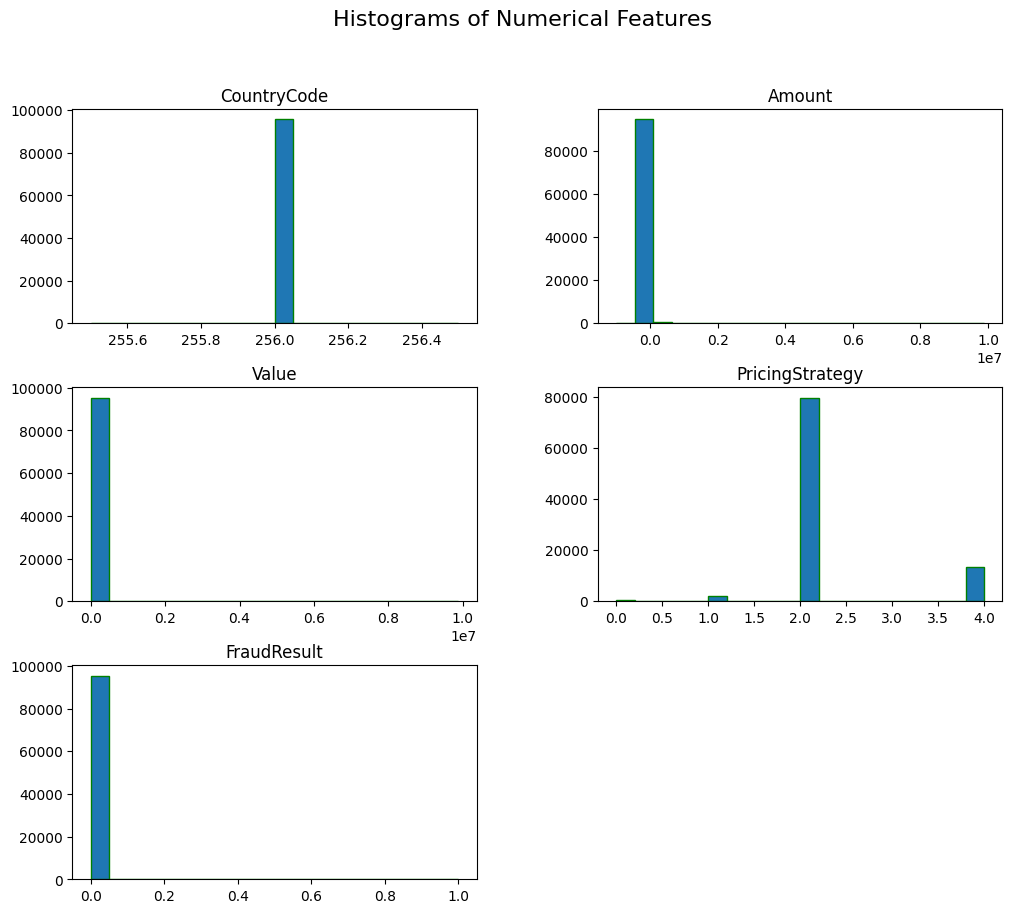

In [12]:
# Plot histograms for all numerical columns
df[numeric_columns].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='green')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# KDE plots

C:\Users\user\AppData\Local\Temp\ipykernel_9560\2935862722.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True)


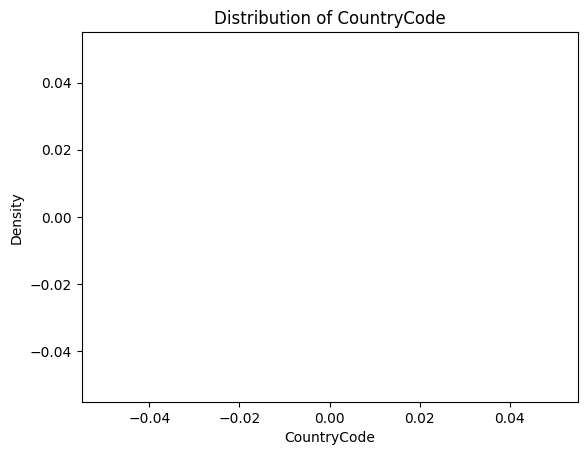

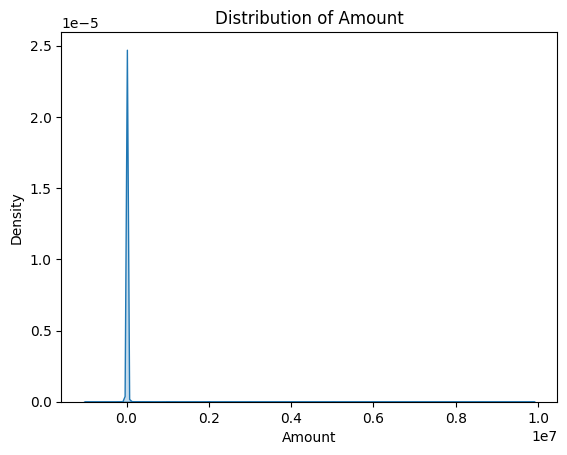

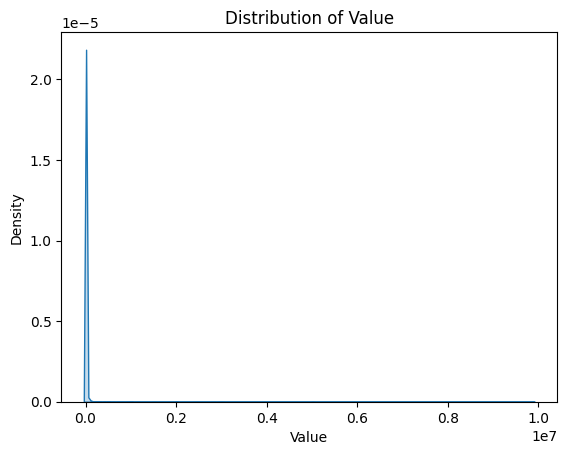

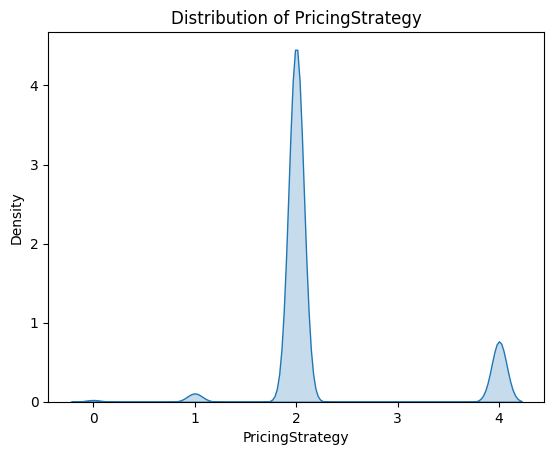

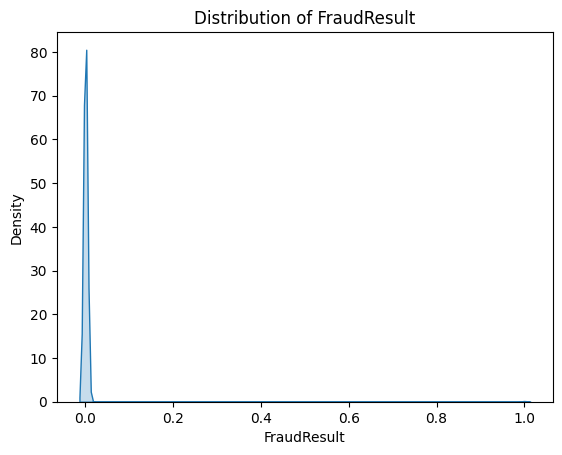

In [13]:
# KDE plots for each numerical column
for col in numeric_columns:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

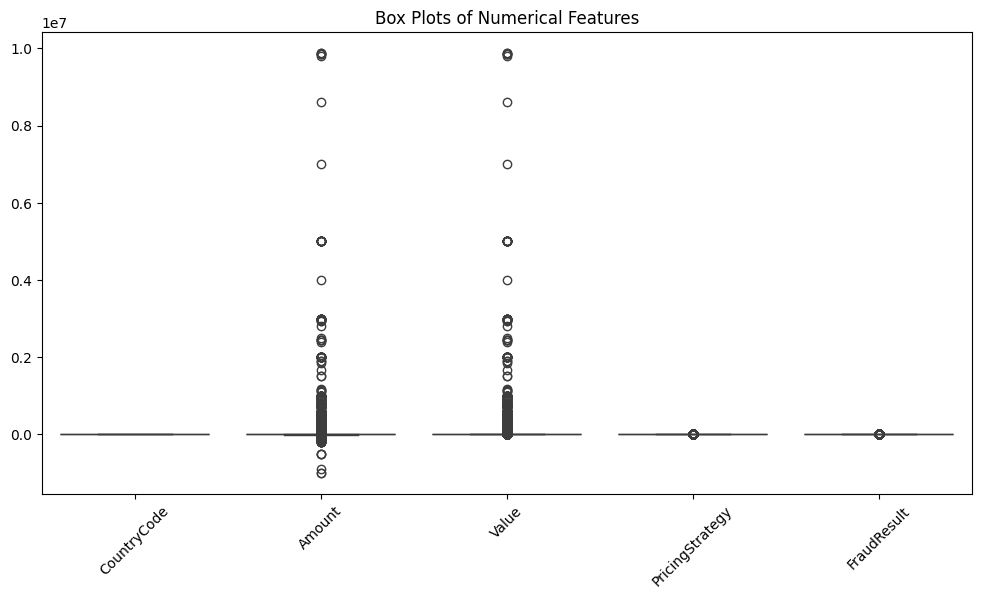

In [14]:
# Box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [15]:
skewness = df[numeric_columns].skew()
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [16]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'TransactionStartTime']
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']


# Distribution of Categorical Features

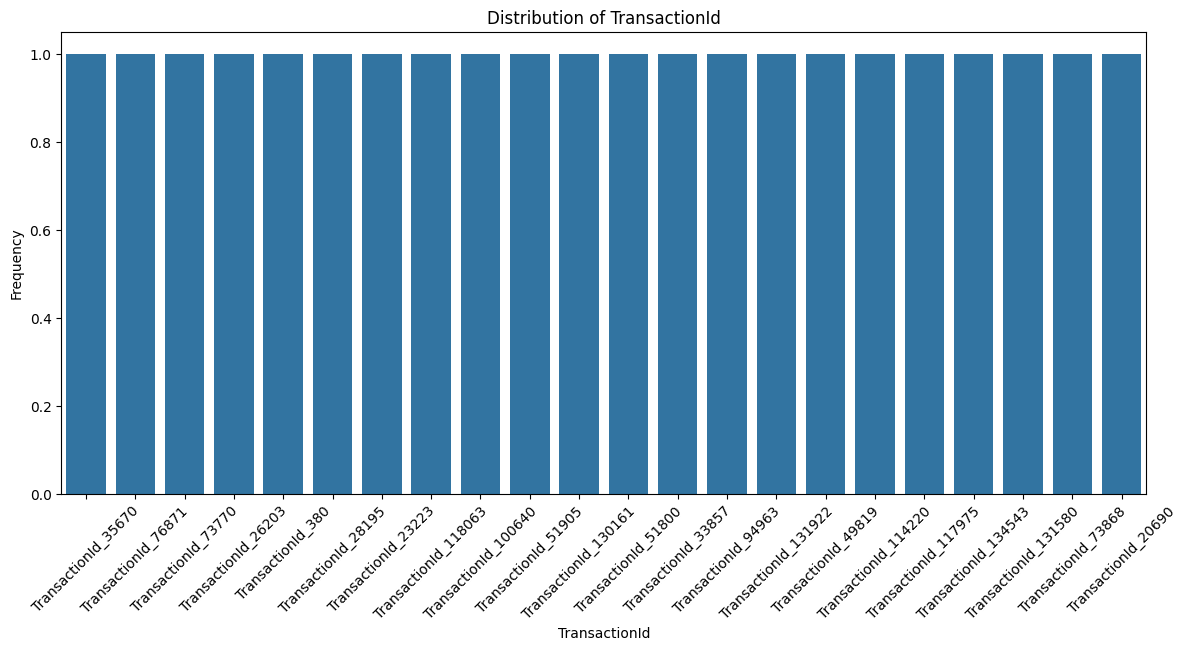

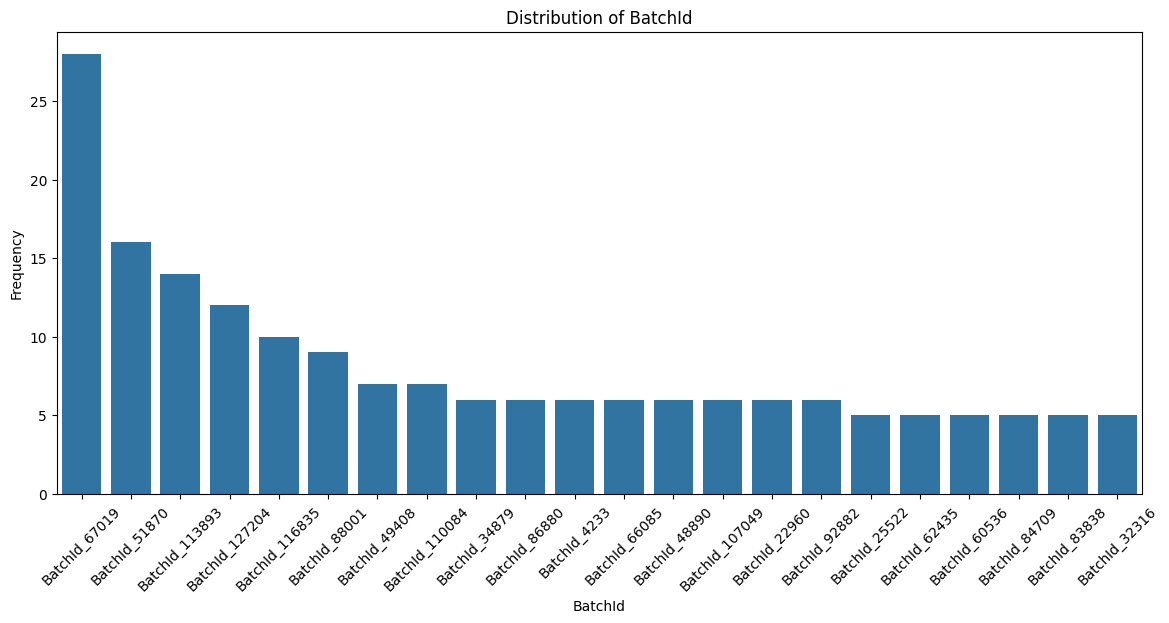

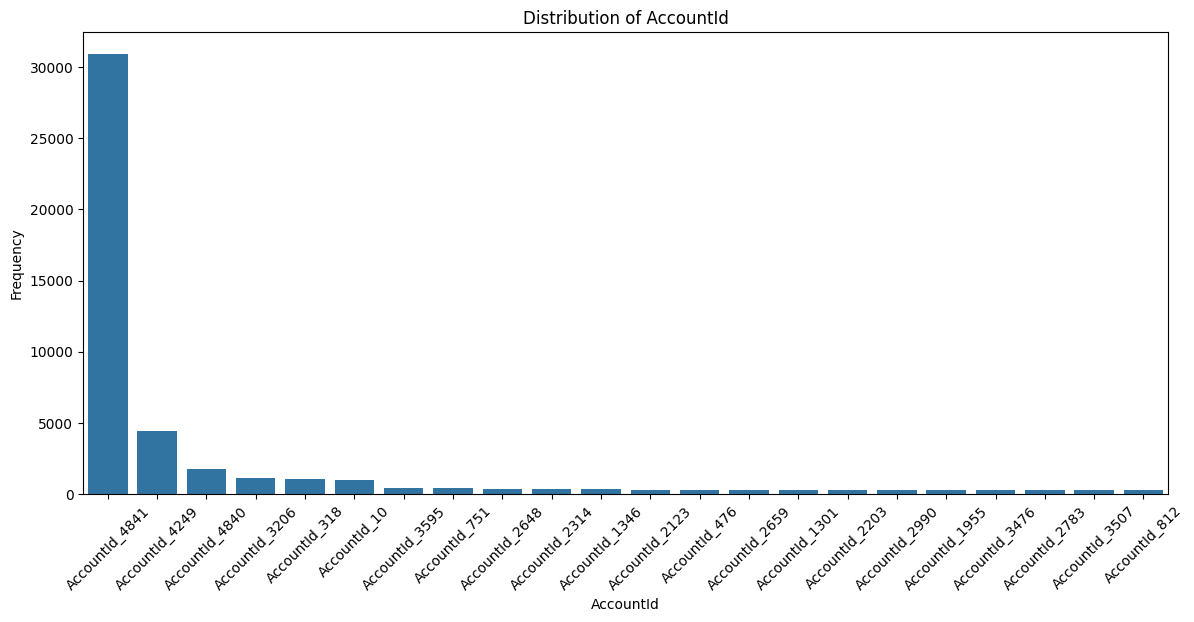

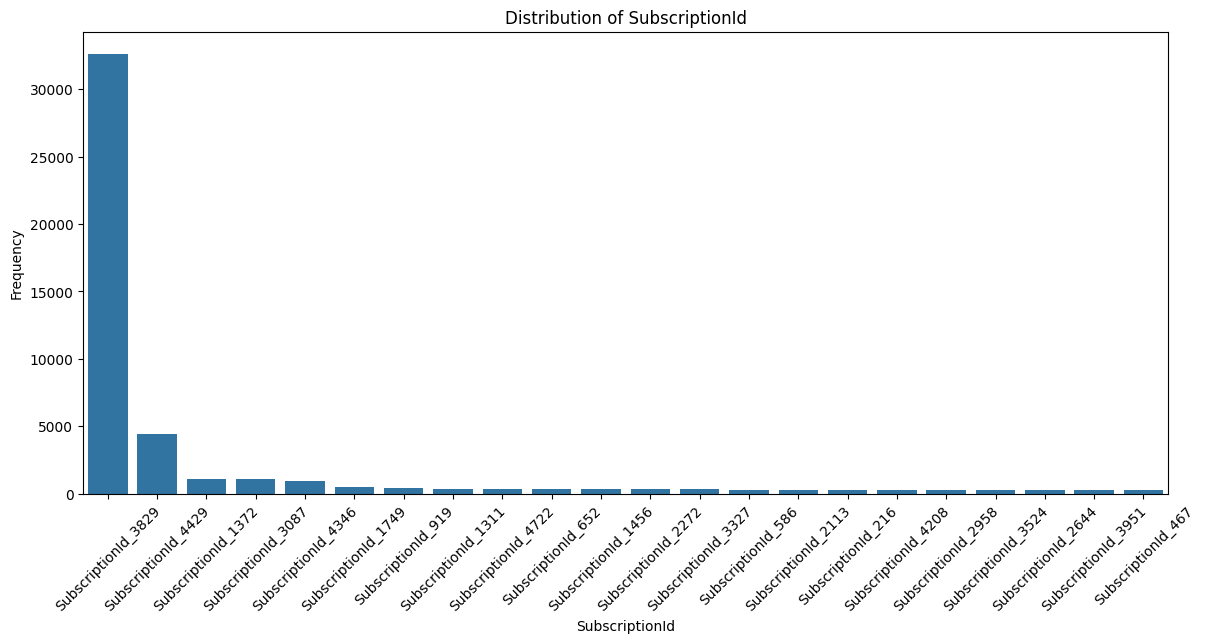

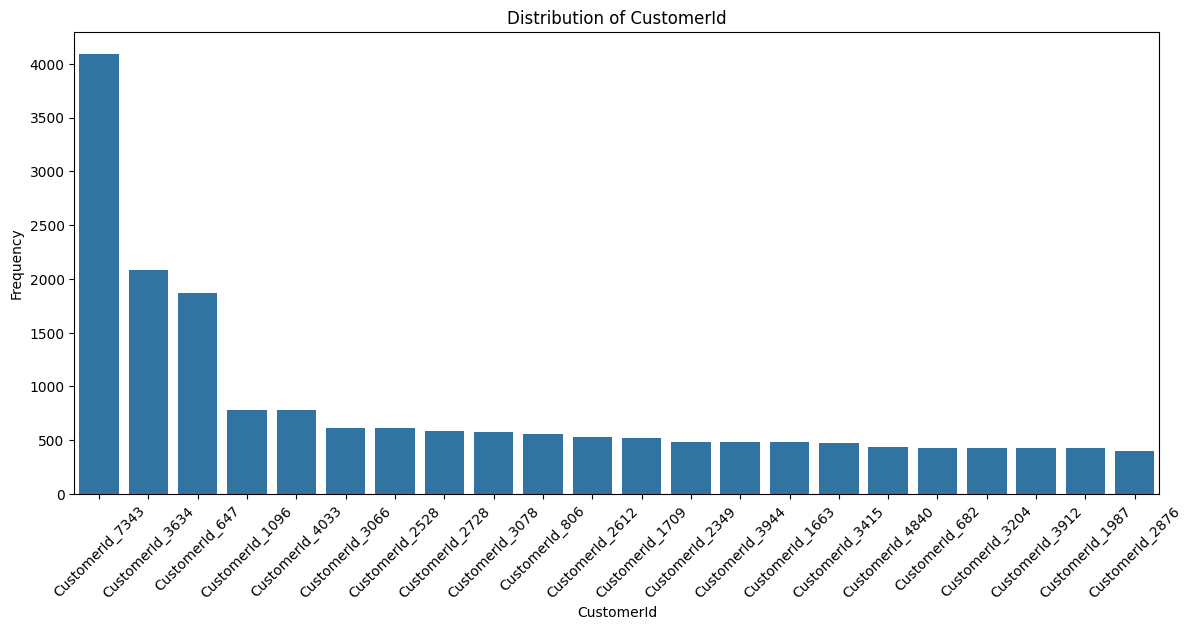

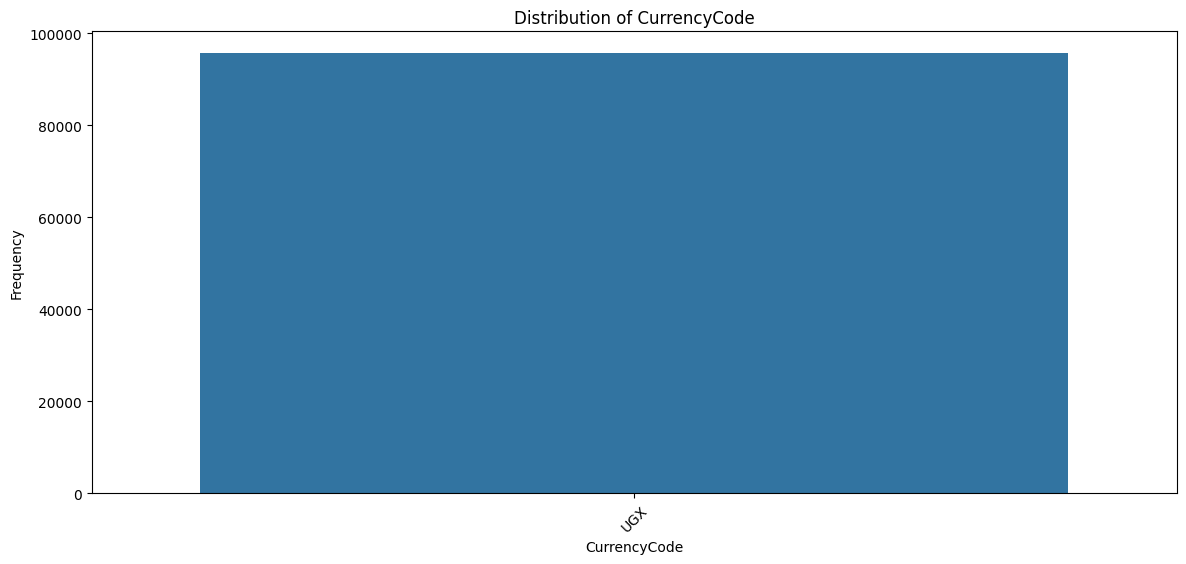

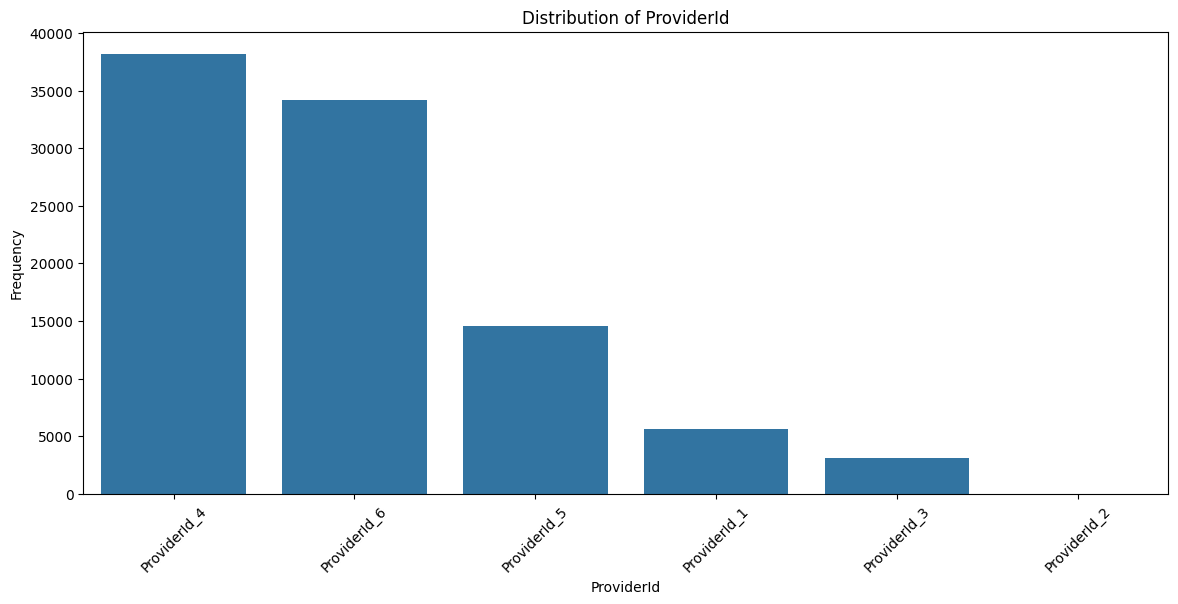

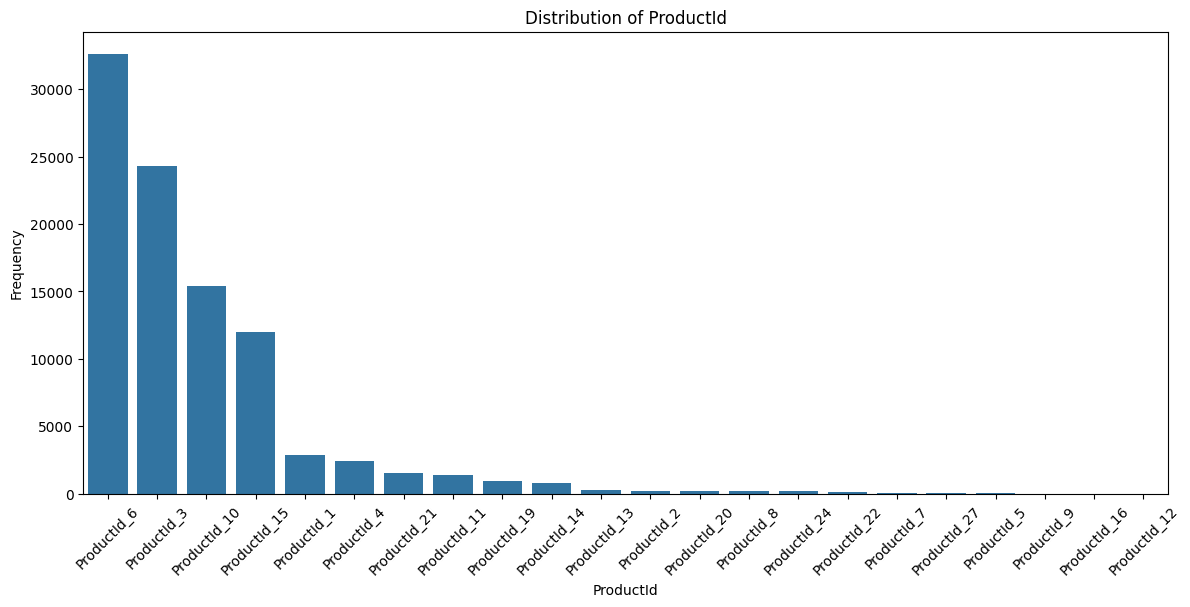

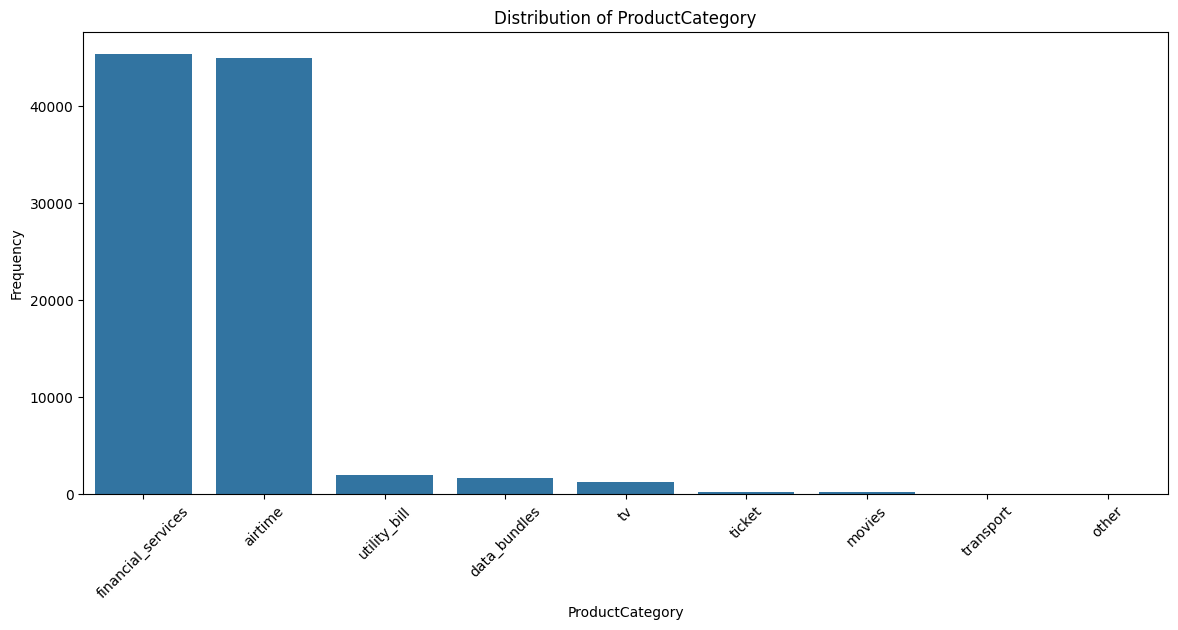

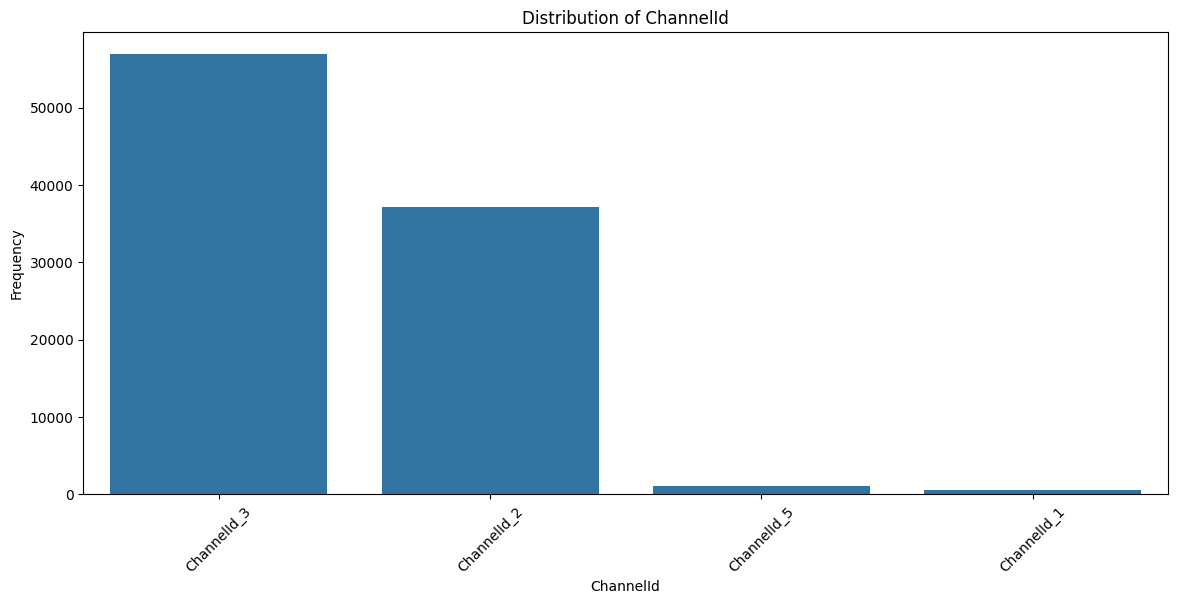

In [18]:
# Calculate frequency counts and show bar charts for each categorical feature
for feature in categorical_columns:
  plt.figure(figsize=(14, 6))
    
  # Calculate frequency counts
  value_counts = df[feature].value_counts().head(22)  # Limit to top 22 categories for performance
    
  # Bar Plot
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.show()

In [5]:
# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


# Correlation heatmap

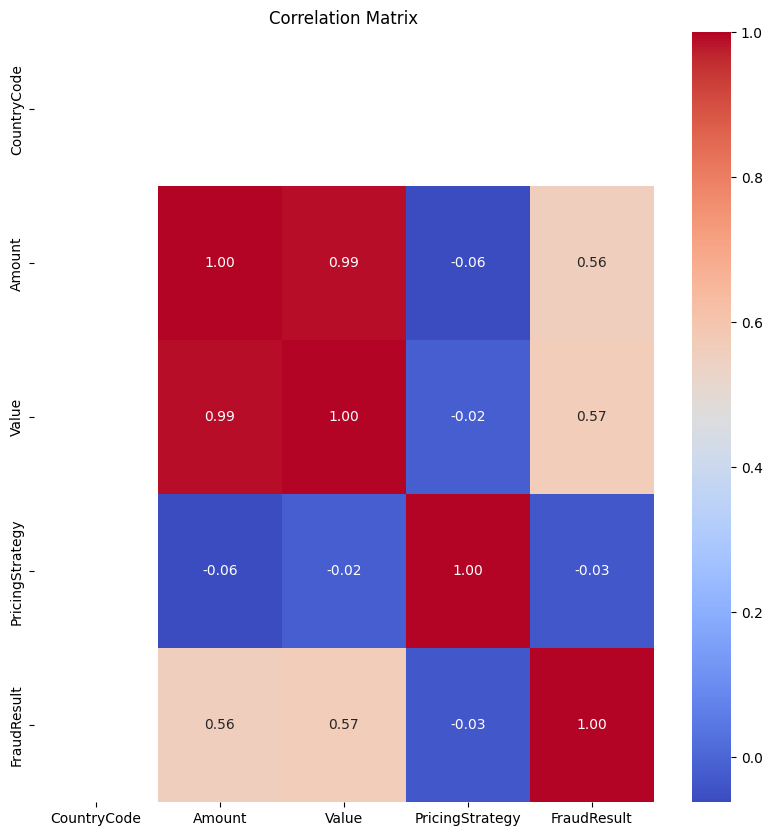

In [7]:
# Plot a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [9]:
# Calculate IQR for each numerical column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
print("Outliers detected:")
print(outliers.sum())  # Prints number of outliers in each column

Outliers detected:
CountryCode            0
Amount             24441
Value               9021
PricingStrategy    15814
FraudResult          193
dtype: int64
